# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("encoded_adimplencia.csv")
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False


In [6]:
y = df.mau
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [8]:
X = df.drop('mau', axis=1)
X.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

[Text(0.6154689915853948, 0.9814814814814815, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Aprovados'),
 Text(0.3564717010585157, 0.9444444444444444, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Aprovados'),
 Text(0.2298796533063749, 0.9074074074074074, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Aprovados'),
 Text(0.06622264509990486, 0.8703703703703703, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Aprovados'),
 Text(0.050237868696479546, 0.8333333333333334, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Aprovados'),
 Text(0.03653663177925785, 0.7962962962962963, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Aprovados'),
 Text(0.018268315889628926, 0.7592592592592593, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Ap

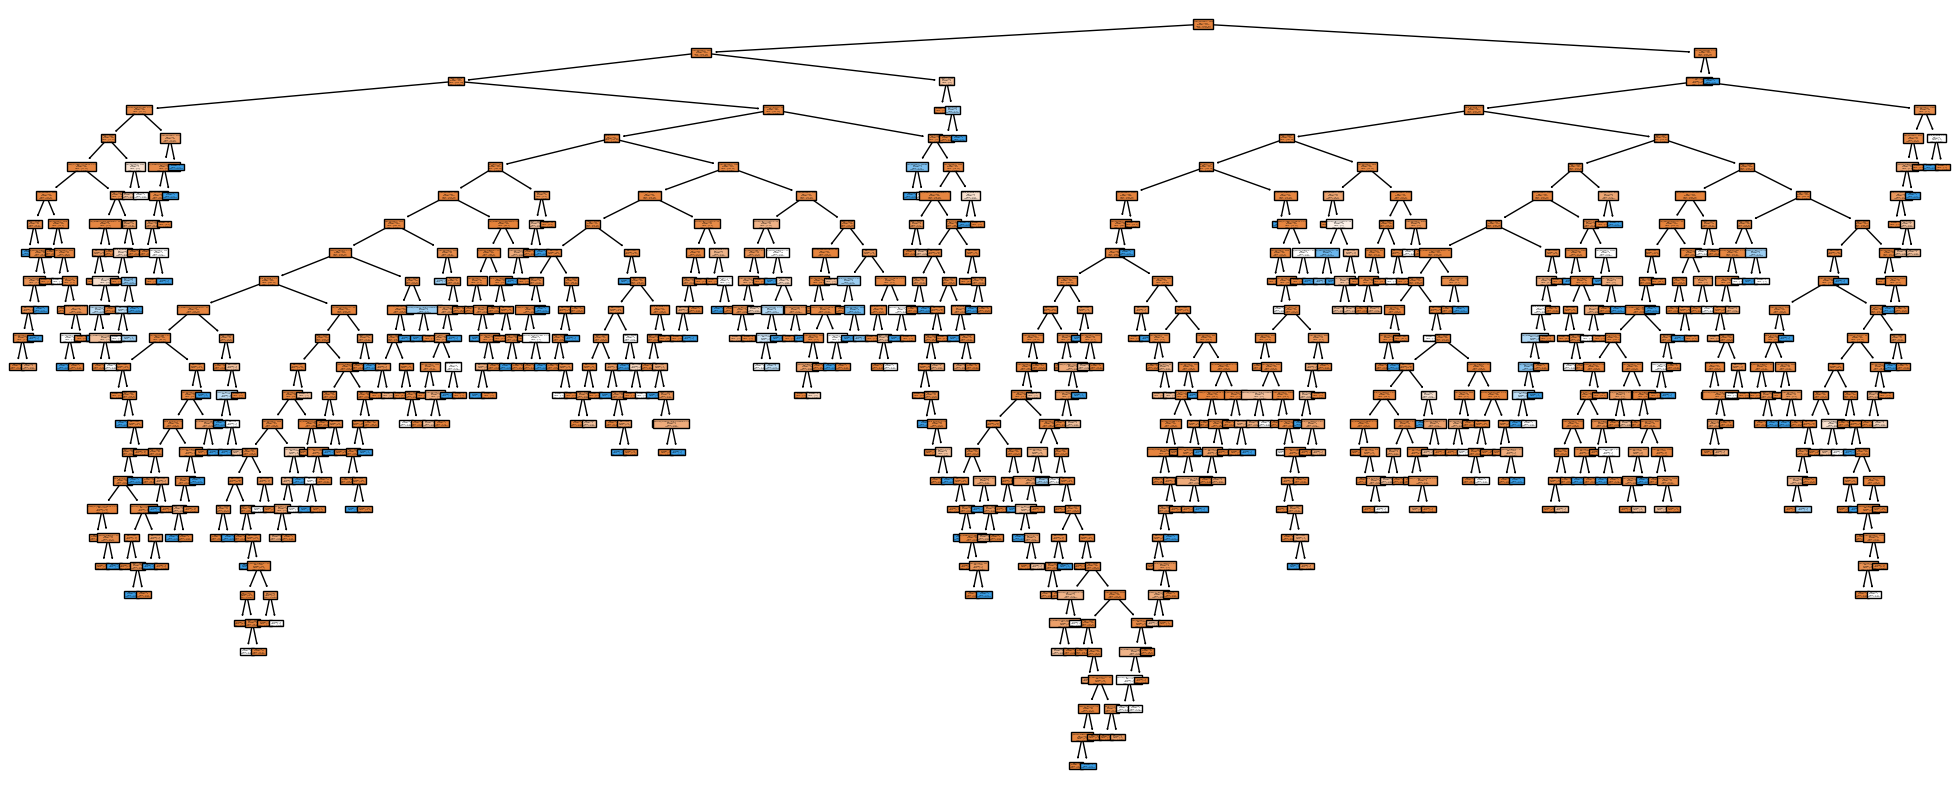

In [11]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(25, 10))
plot_tree(clf,
         filled=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_train.columns)

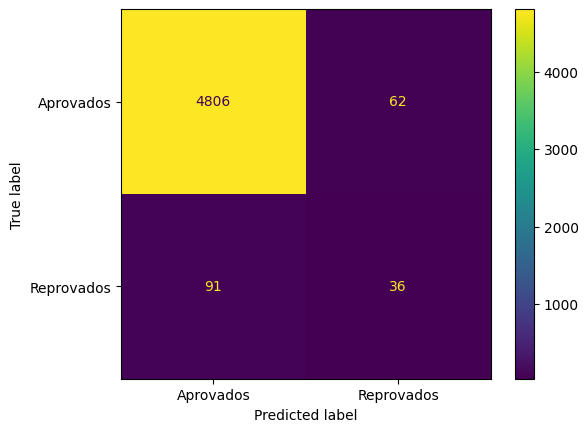

In [13]:
predict = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [14]:
accuracy_score(y_test, predict)

0.9693693693693693

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [20]:
y_train.value_counts(normalize=True)

mau
False    0.977435
True     0.022565
Name: proportion, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

mau
False    0.974575
True     0.025425
Name: proportion, dtype: float64

A base de teste parece ser boa, com a mesma proporção de False e True que a base de  treino.

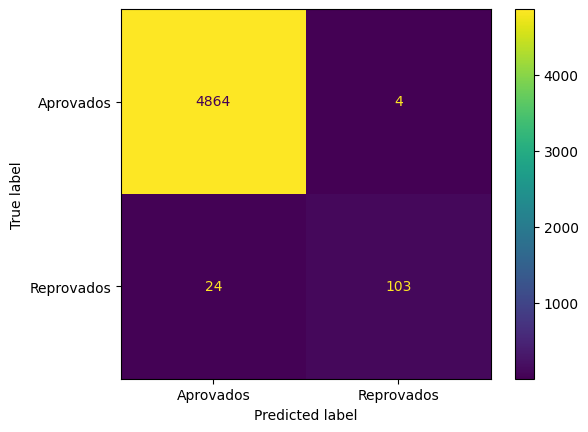

In [22]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_test, y_test)
predict = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [23]:
accuracy_score(y_test, predict)

0.9943943943943944

A acurácia subiu bastante, pois a base de treinamento para essa predição é a própria base de teste. É esperado que isso ocorra.

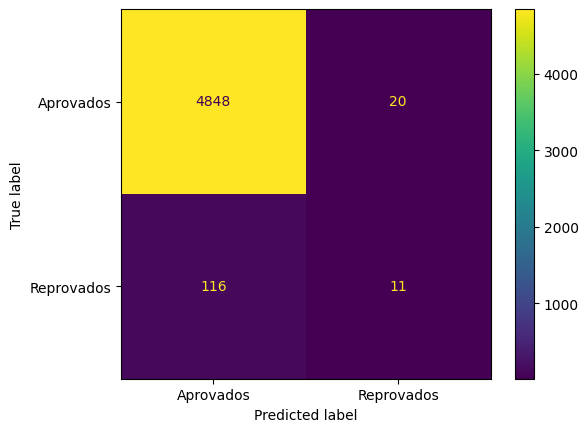

In [26]:
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

A proporção de proponentes classificados como maus caiu significativamente de aproximadamente 100 para 31.

In [27]:
y_test.value_counts(normalize=True)

mau
False    0.974575
True     0.025425
Name: proportion, dtype: float64

Se só classificasse todos como "bons", a acurácia seria de 97,46%, já que é a porcentagem de proponentes bons na base de teste.